In [43]:
pip install --upgrade pip


  Attempting uninstall: pip
    Found existing installation: pip 21.0.1
    Uninstalling pip-21.0.1:
      Successfully uninstalled pip-21.0.1


In [44]:
### Data Collection
!pip install tensorflow
!pip install pandas-datareader
import pandas_datareader as pdr
key=""

  Using cached tensorflow-2.6.0-cp38-cp38-win_amd64.whl (423.2 MB)
  Using cached absl_py-0.14.0-py3-none-any.whl (131 kB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached grpcio-1.40.0-cp38-cp38-win_amd64.whl (3.2 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached tensorflow_estimator-2.6.0-py2.py3-none-any.whl (462 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached h5py-3.1.0-cp38-cp38-win_amd64.whl (2.7 MB)
  Using cached clang-5.0-py3-none-any.whl
  Using cached tensorboard-2.6.0-py3-none-any.whl (5.6 MB)
  Using cached Markdown-3.3.4-py3-none-any.whl (97 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Attempting uninstall: h5py
    Found existing i

In [45]:
!pip install keras

In [46]:
df = pdr.get_data_tiingo('AAPL', api_key='cdb7b0fe15431db5ef65fc98e3615d477d51140c')

In [47]:
df.to_csv('AAPL.csv')

In [48]:
df1=df.reset_index()['close']

In [49]:
df1


0       112.71
1       112.88
2       113.09
3       113.95
4       112.18
         ...  
1252    149.03
1253    148.79
1254    146.06
1255    142.94
1256    143.43
Name: close, Length: 1257, dtype: float64

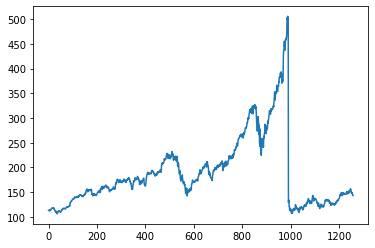

In [50]:

import matplotlib.pyplot as plt
plt.plot(df1)

In [51]:
import numpy as np

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [53]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [54]:
training_size,test_size

(817, 440)

In [55]:
train_data

array([[0.01748339],
       [0.01790799],
       [0.01843249],
       [0.02058045],
       [0.01615965],
       [0.01833258],
       [0.01700884],
       [0.0182077 ],
       [0.01833258],
       [0.02043059],
       [0.02085519],
       [0.02582547],
       [0.02644987],
       [0.0290474 ],
       [0.02814826],
       [0.02977172],
       [0.02957191],
       [0.0293721 ],
       [0.02849793],
       [0.02834807],
       [0.02719916],
       [0.02982167],
       [0.03132025],
       [0.02467656],
       [0.02190419],
       [0.02000599],
       [0.01955642],
       [0.01443629],
       [0.01468605],
       [0.01029022],
       [0.00781757],
       [0.01173885],
       [0.01336231],
       [0.01291273],
       [0.00519506],
       [0.00679355],
       [0.        ],
       [0.00349668],
       [0.01068984],
       [0.01058994],
       [0.01086468],
       [0.01503572],
       [0.01521055],
       [0.0137869 ],
       [0.01518557],
       [0.0146361 ],
       [0.01436136],
       [0.012

In [56]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)


In [57]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [58]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [59]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [61]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [62]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [63]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 59s 3s/step - loss: 0.0133 - val_loss: 0.0338
Epoch 2/100
12/12 [==============================] - 29s 3s/step - loss: 0.0028 - val_loss: 0.0259
Epoch 3/100
12/12 [==============================] - 37s 3s/step - loss: 0.0017 - val_loss: 0.0219
Epoch 4/100
12/12 [==============================] - 30s 3s/step - loss: 7.7875e-04 - val_loss: 0.0206
Epoch 5/100
12/12 [==============================] - 29s 3s/step - loss: 4.9054e-04 - val_loss: 0.0259
Epoch 6/100
12/12 [==============================] - 22s 2s/step - loss: 4.6471e-04 - val_loss: 0.0254
Epoch 7/100
12/12 [==============================] - 20s 2s/step - loss: 5.0107e-04 - val_loss: 0.0223
Epoch 8/100
12/12 [==============================] - 22s 2s/step - loss: 4.3110e-04 - val_loss: 0.0219
Epoch 9/100
12/12 [==============================] - 30s 3s/step - loss: 4.0165e-04 - val_loss: 0.0222
Epoch 10/100
12/12 [==============================] - 33s 3s/step - loss: 3.8688e-04 

In [64]:

import tensorflow as tf

In [65]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [66]:

##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [67]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

187.80692331565623

In [68]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

234.37377404124456

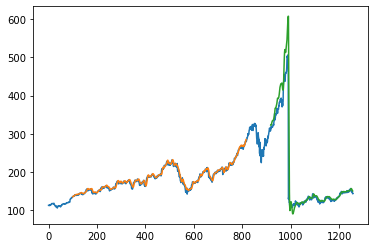

In [69]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [70]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 99)

In [71]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()


### Motivation https://machinelearningmastery.com/time-series-prediction-with-deep-learning-in-python-with-keras/